# Анализ успешности игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.          
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Начинаем работу с импорта необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

Теперь откроем датасет

In [2]:
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Шаг 2. Подготовьте данные**

Посмотрим общую информацию о датасете

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


***Описание данных***
              
Name — название игры                    
Platform — платформа                   
Year_of_Release — год выпуска                  
Genre — жанр игры                       
NA_sales — продажи в Северной Америке (миллионы проданных копий)                 
EU_sales — продажи в Европе (миллионы проданных копий)                 
JP_sales — продажи в Японии (миллионы проданных копий)                   
Other_sales — продажи в других странах (миллионы проданных копий)                
Critic_Score — оценка критиков (максимум 100)                  
User_Score — оценка пользователей (максимум 10)                    
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.                 

***Вывод:***            
При первом взгляде на данные видим пропуски;          
Тип данных в столбце **Year_of_Release** с текущего float изменим на int (странно выглядит год, написанных дробным числом);     
Изменим тип данных в столбце **User_Score** с object на float. 

Приведем названия столбцов к нижнему регистру

In [6]:
games.columns = games.columns.str.lower()
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Теперь разберемся с пропусками в данных

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
pd.DataFrame(round(games.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
critic_score,51.300000
rating,40.500000
user_score,40.100000
year_of_release,1.600000
name,0.000000
genre,0.000000
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Пропуски в столбцах **name**, **genre**, **year_of_release** удалим, корректно заполнить эти пропуски не представляется возможным; <br>Пропусков в столбцах **critic_score**, **user_score**, **rating** слишком много, оставим как есть, заполенение пропусков может оказать влияние на весь анализ;<br>Обратим внимание на значение **tbd** (To Be Determined, то есть "Будет определено") заменим его на NaN, чтобы не мешало при дальнейшем анализе.<br> Пропуски в данных могли возникнуть по разным причинам: например, критики могли не успеть оценить недавно вышедшие игры, данные могли быть осознанно не заполнены интервьюируемым, например, не определился с оценкой, также интервьюируемый мог забыть год релиза игры. <br>
Заменим пропуски в столбце **rating** на "Unknown", чтобы в дальнейшем пропуски не повлияли на результаты расчетов.

In [9]:
games.dropna(subset=['name'], inplace=True)
games['name'].isna().sum()

0

In [10]:
games.dropna(subset=['genre'], inplace=True)
games['genre'].isna().sum()

0

In [11]:
games.dropna(subset=['year_of_release'], inplace=True)
games['year_of_release'].isna().sum()

0

In [12]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: object

Изменим тип данных в столбце user_score с object на float

In [13]:
games['user_score'] = games['user_score'].astype('float')
games['user_score'] 

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: float64

Изменим тип данных в столбце year_of_release с float на int

In [14]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'] 

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int64

Создадим столбец **total_sale**, чтобы посчитать суммарные продажи во всех регионах

In [15]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

In [16]:
games.duplicated().sum()

0

In [17]:
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Обнаружены повторяющиеся строки, несовсем понятно почему данные в них значительно отличаются, возможно, произошла ошибка при их выгрузке, удалим нижнюю строку, это не повлияет на общий результат. 

In [18]:
games.drop_duplicates(subset = ['name', 'platform','year_of_release'], inplace = True)
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Заменим пропуски в столбце **rating** на "Unknown", чтобы в дальнейшем пропуски не повлияли на результаты расчетов.

In [19]:
games['rating'] = games['rating'].fillna('unknown')
games['rating']

0              E
1        unknown
2              E
3              E
4        unknown
          ...   
16710    unknown
16711    unknown
16712    unknown
16713    unknown
16714    unknown
Name: rating, Length: 16443, dtype: object

**Вывод**
<br>Получили общую информацию о датасете.
<br>Привели названия столбцов к нижнему регистру.
<br>Преобразовали типы данных в столбцах **user_score**, **year_of_release**.
<br>Пропуски в столбцах **name**, **genre**, **year_of_release** удалили.
<br>Пропусков в столбцах **critic_score**, **user_score**, **rating** оставили без изменений, значения **tbd** заменили на NaN.
<br>Явных дубликатов нет, неявные дубликаты удалены.
<br>Заменили пропуски в столбце **rating** на "Unknown", чтобы в дальнейшем пропуски не повлияли на результаты расчетов.

**Шаг 3. Проведите исследовательский анализ данных**

Посмотрим, сколько игр выпускалось в разные годы

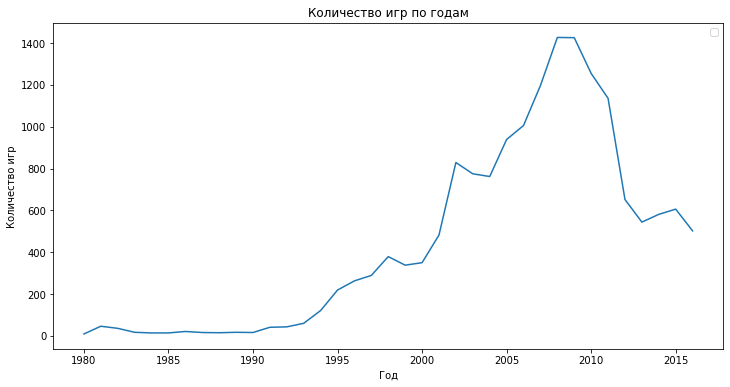

In [20]:
games_of_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_of_year)
plt.title("Количество игр по годам")
plt.xlabel("Год")
plt.ylabel("Количество игр")
plt.legend('');


Первые игры были выпущены в 1980 году. Из графика видим, что с 1991 года есть начинается рост в количестве выпущенных игр, связанный с доступностью персональных компьютеров.
C 2010 идёт спад продаж, возможно вызванный распространением мобильных устройств.<br />
Период 2011-2016гг. отображает текущий тренд к снижению продаж.

Посмотрим как менялись продажи по платформам.

In [21]:
platforms_top = pd.pivot_table(games,
                                  index = 'platform',
                                  values = ['total_sales', 'year_of_release'],
                                  aggfunc = {'total_sales': 'sum', 'year_of_release': 'min'}).sort_values(by = 'total_sales', ascending = False)

platforms_top

,total_sales,year_of_release
platform,,
PS2,1233.56,2000
X360,961.24,2005
PS3,931.33,2006
Wii,891.18,2006
DS,802.78,1985
PS,727.58,1994
PS4,314.14,2013
GBA,312.88,2000
PSP,289.53,2004


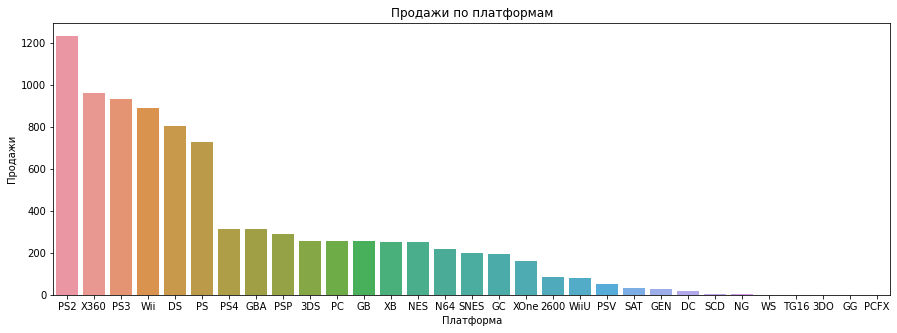

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x=platforms_top.index, y=platforms_top['total_sales'])
plt.title("Продажи по платформам")
plt.xlabel("Платформа")
plt.ylabel("Продажи");

Наибольшие суммарные продажи у 6-ти платформ: PS2, X360, PS3, Wii, DS, PS.<br />
Построим распределение по годам.

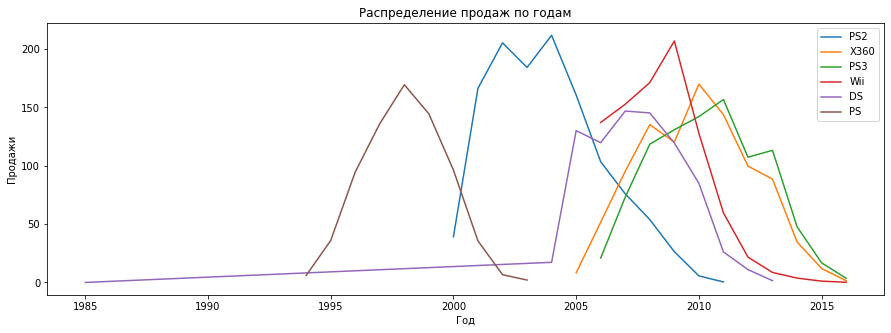

In [23]:
plt.figure(figsize=(15,5))
plt.title('Распределение продаж по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')

for name in platforms_top.index.values[:6]:
    games_by_platform = games[(games['platform'] == name)]
    total_sale_by_year = games_by_platform.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    sns.lineplot(data=total_sale_by_year['total_sales'], label=name)
    plt.legend()

Продолжительность "жизни платформ" распределена следующим образом:<br />
PS2 - 2000 - 2011 годы (12 лет), <br />X360 - 2005 - 2016 (12 лет), <br /> PS3 - 2006 - 2016 (11 лет),<br /> Wii - 2006 - 2016 (11 лет),<br /> DS - 1985 - 2013 (29 лет),<br /> PS - 1994 - 2003 (9 лет).<br />
Таким образом, не реже, чем 1 раз в  9 лет появляется новая платформа и исчезает старая.

Для дальнейшей работы будем использовать данные за 2014-2016гг., т.к. за 2016 год некоторые колонки не могут быть адекватно заполнены, а для прогнозирования берем период не менее 2х лет.

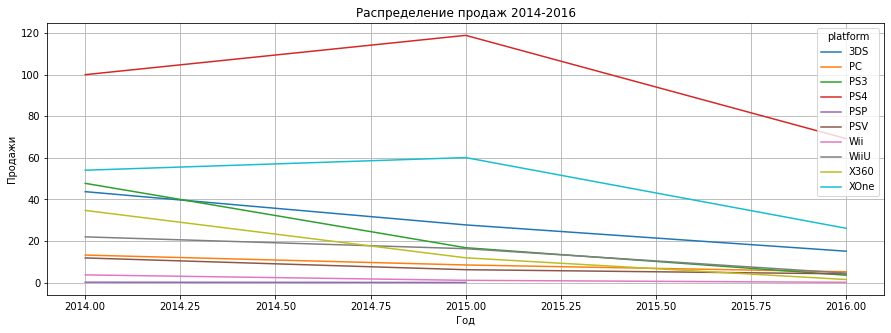

In [24]:
games_current_period = games.query('2014 <= year_of_release <= 2016')
games_current_period.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 5))
plt.title('Распределение продаж 2014-2016')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

По продажам лидируют платформы PS4, XOne, 3DS поэтому они являются потенциально прибыльными. <br />
Продажи всех платформ падают. <br />

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

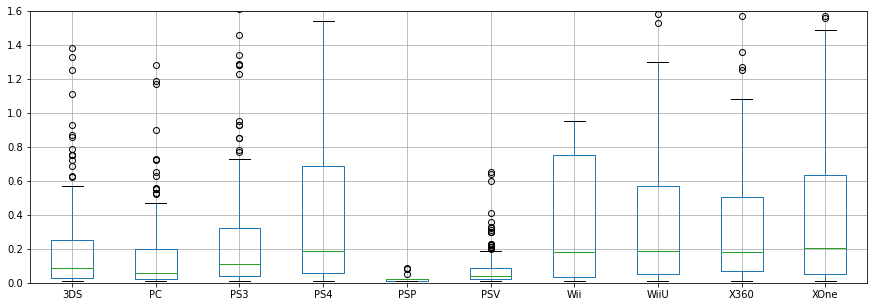

In [25]:
plot = games_current_period.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').boxplot(grid=True, figsize=(15, 5))
plot.set(ylim=(0, 1.6));


В период с 2014 по 2016 самые высокие средние продажи были у игр, произведенных для платформ:<br />
PS4 (max продажи - 15, медиана 0.2),<br />
XOne (max продажи - 7, медиана 0.2),<br />
X360 (max продажи -4.5, медиана 0.2),<br />
3DS (max продажи - 7, медиана 0.2),<br />
WiiU (max продажи - 7, медиана 0.2).

PS4 - самая популярная и успешная платформа: игры, созданные для нее, продавались большими тиражами. <br />
Аутсайдер по продажам PSP. <br />
По выбросам видно что популярной игра может быть и на менее популярных платформах таких так 3DS.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

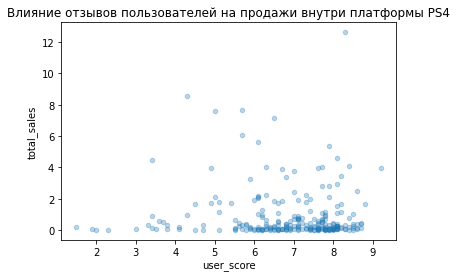

Корреляция между отзывами пользователей и продажами: -0.040131589472697356


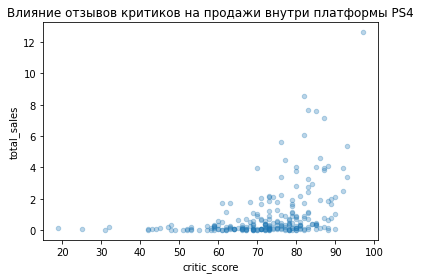

Корреляция между отзывами критиков и продажами: 0.40266141068104083


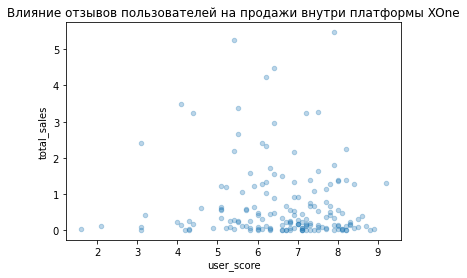

Корреляция между отзывами пользователей и продажами: -0.0703839280647581


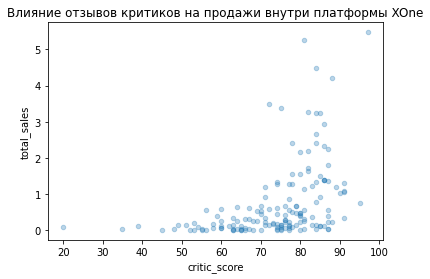

Корреляция между отзывами критиков и продажами: 0.42867694370333226


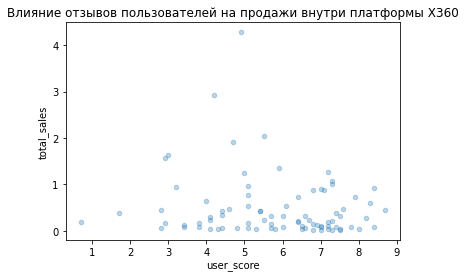

Корреляция между отзывами пользователей и продажами: -0.138444570945665


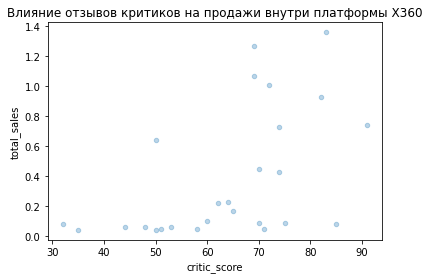

Корреляция между отзывами критиков и продажами: 0.5257228356581523


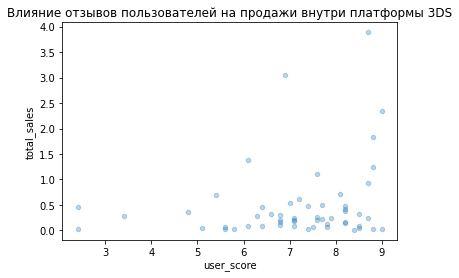

Корреляция между отзывами пользователей и продажами: 0.2151932718527028


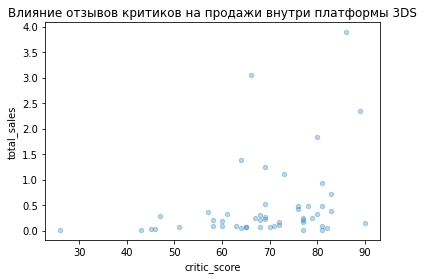

Корреляция между отзывами критиков и продажами: 0.314117492869051


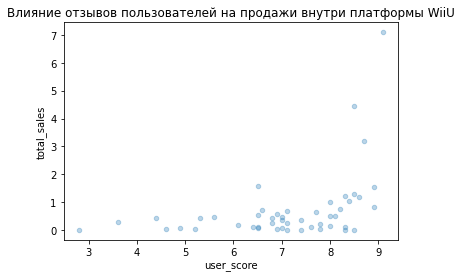

Корреляция между отзывами пользователей и продажами: 0.4079264579217078


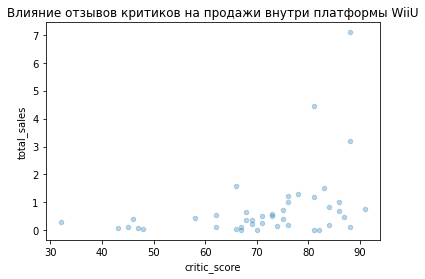

Корреляция между отзывами критиков и продажами: 0.370201412480884


In [26]:
for name in ['PS4', 'XOne','X360', '3DS', 'WiiU']:
    games_by_platform = games_current_period.query(f"platform == '{name}'")
    games_by_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
    plt.title(f"Влияние отзывов пользователей на продажи внутри платформы {name}")
    plt.show()
    print('Корреляция между отзывами пользователей и продажами:', games_by_platform['total_sales'].corr(games_by_platform['user_score']))
    games_by_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
    plt.title(f"Влияние отзывов критиков на продажи внутри платформы {name}")
    plt.show()
    print('Корреляция между отзывами критиков и продажами:',games_by_platform['critic_score'].corr(games_by_platform['total_sales']))

Для всех платформ оценки критиков оказывают слабое влияние на уровень продаж, оценка пользователей не влияет на продажи для PS4, XOne, X360.
Для WiiU и 3DS слабо влияют и оценки критиков, и оценки пользователей.

Посмотрим на общее распределение игр по жанрам. 

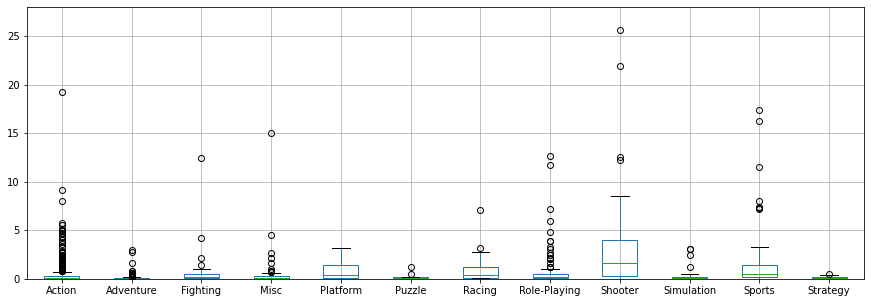

In [27]:
plot = games_current_period.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').boxplot(grid=True, figsize=(15, 5))
plot.set(ylim=(0, 28));

Явный лидер среди жанров - shooter. Медиана - 1.5, max - 25, небольшое количество выбросов и большинство значений входят в межквартильный размах.

**Вывод:**<br />
<br>Первые игры были выпущены в 1980 году. Из графика видим, что с 1991 года есть начинается рост в количестве выпущенных игр, связанный с доступностью персональных компьютеров. C 2010 идёт спад продаж, возможно вызванный распространением мобильных устройств.
<br>Для дальнейшей работы использовали данные за 2014-2016гг., т.к. за 2016 год некоторые колонки не могут быть адекватно заполнены, а для прогнозирования берем период не менее 2х лет.<br />
<br>Наибольшие суммарные продажи у 6-ти платформ: PS2, X360, PS3, Wii, DS, PS.<br />
<br>Не реже, чем 1 раз в  9 лет появляется новая платформа и исчезает старая.
<br>По продажам лидируют платформы PS4, XOne, 3DS поэтому они являются потенциально прибыльными.
<br>Продажи всех платформ падают.<br />
<br>В период с 2014 по 2016 самые высокие средние продажи были у игр, произведенных для платформ:
<br>PS4 (max продажи - 15, медиана 0.2),
<br>XOne (max продажи - 7, медиана 0.2),
<br>X360 (max продажи -4.5, медиана 0.2),
<br>3DS (max продажи - 7, медиана 0.2),
<br>WiiU (max продажи - 7, медиана 0.2).

<br>PS4 - самая популярная и успешная платформа: игры, созданные для нее, продавались большими тиражами.
Аутсайдер по продажам PSP.
По выбросам видно что популярной игра может быть и на менее популярных платформах таких так 3DS.
<br>Для всех платформ оценки критиков оказывают слабое влияние на уровень продаж, оценка пользователей не влияет на продажи для PS4, XOne, X360. Для WiiU и 3DS слабо влияют и оценки критиков, и оценки пользователей.<br />
<br>Явный лидер среди жанров - shooter.

**Шаг 4. Составьте портрет пользователя каждого региона**

Определим самые популярные платформы для региона Северная Америка.

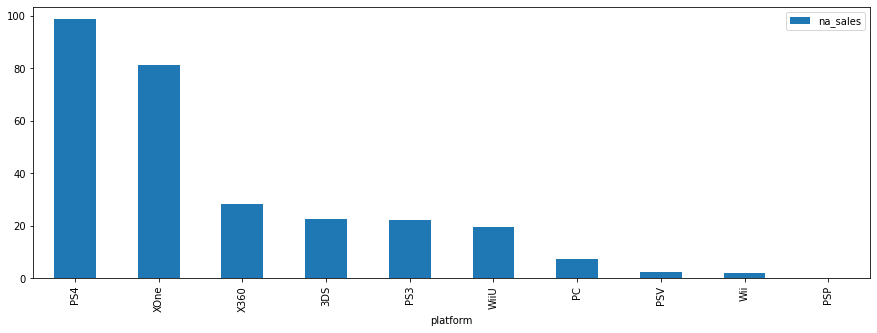

In [28]:
games_current_period.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5));

AxesSubplot(0.125,0.125;0.775x0.755)


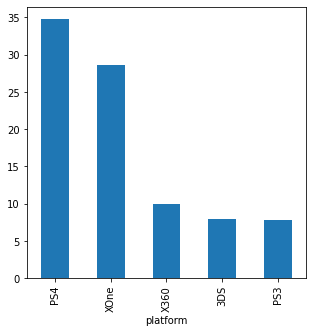

In [29]:
games_current_period_part_na = games_current_period.groupby('platform')['na_sales'].sum() / games_current_period['na_sales'].sum() * 100
print(games_current_period_part_na.sort_values(ascending=False)[:5].plot(kind = 'bar', figsize=(5,5)));

На графике видны значительные различия в долях продаж.
Максимальный уровень продаж для региона Северная Америка приходится на платформу PS4 и составляет 35% от общего числа продаж в регионе. Минимальный уровень - 8% (3DS, PS3).

Выявим самые популярные жанры для региона Свереная Америка.

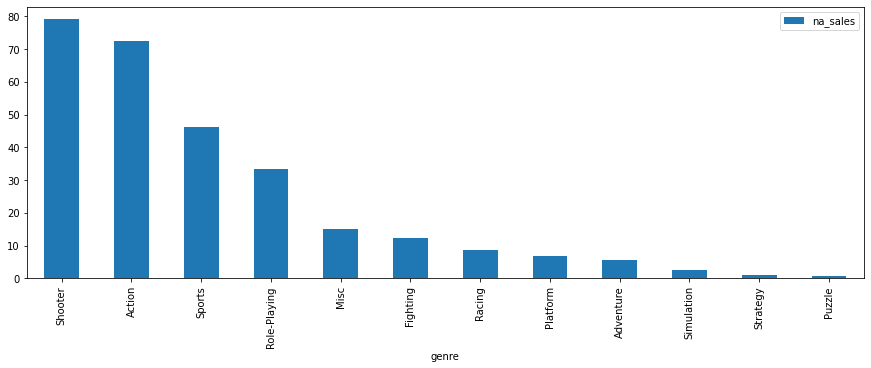

In [30]:
games_current_period.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5));

Самые популярные жанры в Северной Америке shooter, action, sports, role-playing, misc.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [31]:
ESRB = games_current_period.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


Рейтинг влияет на продажи в отдельных регионах. Игры с рейтингом М продавались в Европе и Северной Америке. В Японии самые продаваемые игры с рейтингом Т. 

Определим самые популярные платформы для региона Европа.

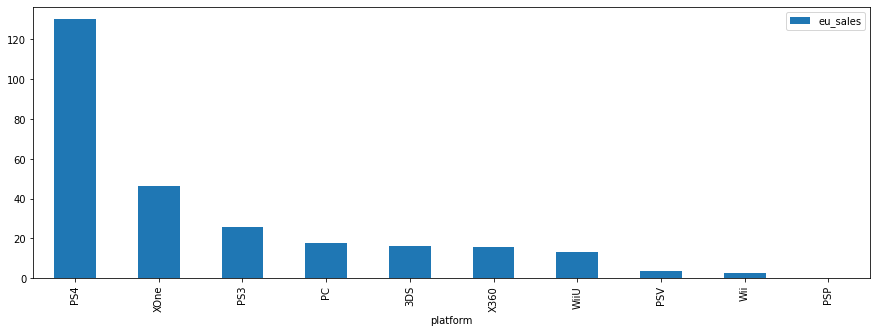

In [32]:
games_current_period.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5));

Топ-5 платформ в Европе: PS4, XOne, PS3, PC, 3DS.

platform
3DS      5.955372
PC       6.638836
PS3      9.435496
PS4     48.041968
PSP      0.000000
PSV      1.304123
Wii      0.956849
WiiU     4.858135
X360     5.722625
XOne    17.086597
Name: eu_sales, dtype: float64

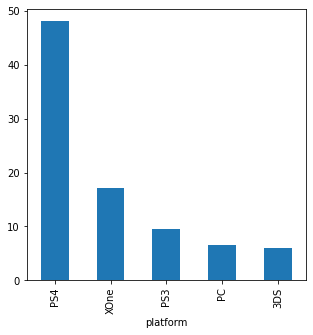

In [33]:
games_current_period_part_eu = games_current_period.groupby('platform')['eu_sales'].sum() / games_current_period['eu_sales'].sum() * 100
games_current_period_part_eu.sort_values(ascending=False)[:5].plot(kind = 'bar', figsize=(5,5));
games_current_period_part_eu

На графикео очевидны различия в долях продаж.
Максимальный уровень продаж для региона Европа приходится на платформу PS4 и составляет практически 50% от общего числа продаж в регионе. Минимальный уровень -5% (PC).

Выявим самые популярные жанры для региона Европа.

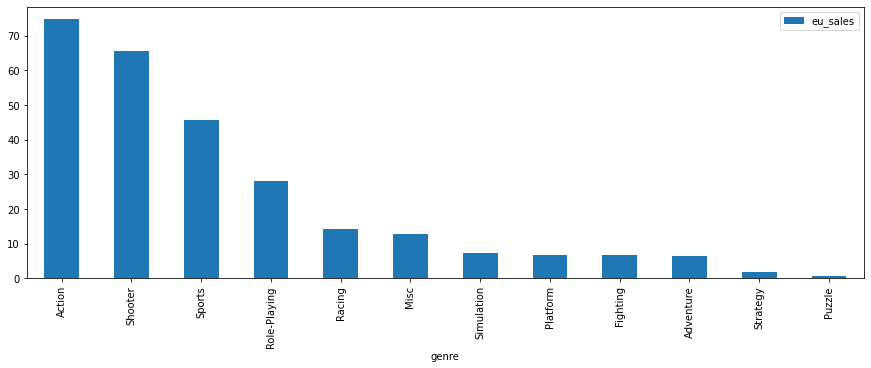

In [34]:
games_current_period.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5));

Топ-5 жанров в Европе: action, shooter, sports, role-playing, racing.

Определим самые популярные платформы для региона Япония.

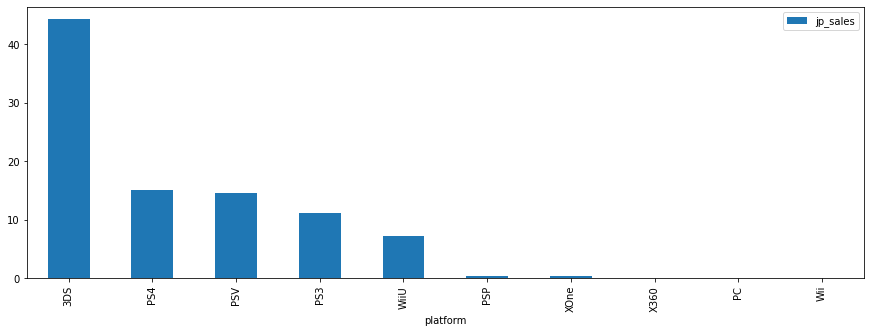

In [35]:
games_current_period.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5));

platform
3DS     47.523902
PC       0.000000
PS3     12.052852
PS4     16.134923
PSP      0.386723
PSV     15.619293
Wii      0.000000
WiiU     7.852616
X360     0.085938
XOne     0.343753
Name: jp_sales, dtype: float64

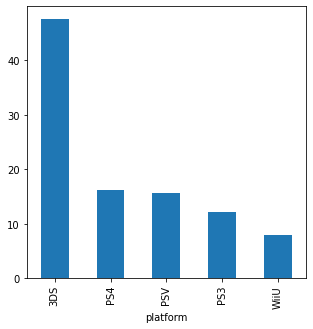

In [36]:
games_current_period_part_jp = games_current_period.groupby('platform')['jp_sales'].sum() / games_current_period['jp_sales'].sum() * 100
games_current_period_part_jp.sort_values(ascending=False)[:5].plot(kind = 'bar', figsize=(5,5));
games_current_period_part_jp

В Японии наибольшей популярностью пользуется 3DS (45%), остальное - play station разных версий. Скорее всего это вызвано тем, что консоли производятся в самой Японии.

Выявим самые популярные жанры для региона Япония.

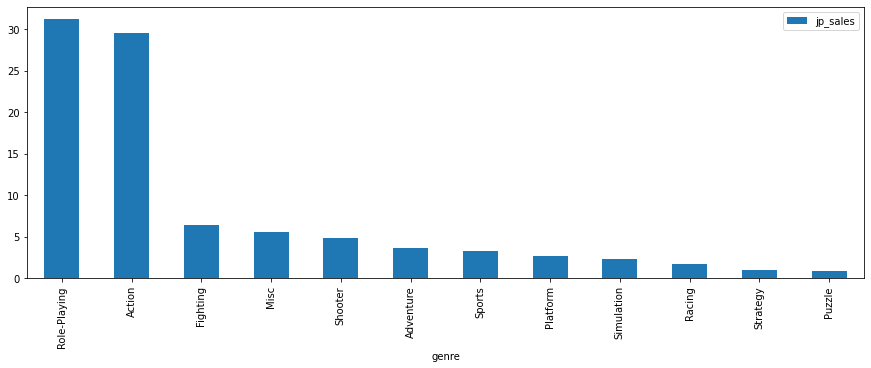

In [37]:
games_current_period.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5));

Самые популярные жанры в Японии: role-playing, action, fighting,  misc, shooter.

**Вывод:**<br />
Максимальный уровень продаж для региона Северная Америка приходится на платформу PS4 и составляет 35% от общего числа продаж в регионе. Минимальный уровень - 8% (3DS, PS3)..<br />
Максимальный уровень продаж для региона Европа приходится на платформу PS4 и составляет практически 50% от общего числа продаж в регионе. Минимальный уровень -5% (PC).<br />
В Японии наибольшей популярностью пользуется 3DS (45%), остальное - play station разных версий. Скорее всего это вызвано тем, что консоли производятся в самой Японии.<br />
Топ-5 жанров в Северной Америке: shooter, action, sports, role-playing, misc.<br />
Топ-5 жанров в Европе: action, shooter, sports, role-playing, racing.<br />
Топ-5 жанров в Японии: role-playing, action, fighting,  misc, shooter. <br />
Рейтинг влияет на продажи в отдельных регионах. Игры с рейтингом М продавались в Европе и Северной Америке, в то время как в Японии игры с этим рейтингом, наименее популярны. Игры с рейтингом ЕС, RP не пользуются спросом во всех регионах.

**Шаг 5. Проверьте гипотезы**

***Гипотеза №1***<br />
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br />
Н_1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [38]:
Xbox_user_score = games_current_period.query("platform == 'XOne' and user_score > 0")['user_score']
PC_user_score = games_current_period.query("platform == 'PC' and user_score > 0")['user_score']
print(Xbox_user_score.mean())
print(PC_user_score.mean())


results = st.ttest_ind(Xbox_user_score, PC_user_score, equal_var=False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

6.594545454545456
6.298360655737705
0.11601398086668832
Не удалось отвергнуть нулевую гипотезу


Значение p-value равно 11%. Не получилось опровергнуть нулевую гипотезу, значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

***Гипотеза №2***<br />

Н_0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны<br />
Н_1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [39]:
Action_genre = games_current_period.query("genre == 'Action' and user_score > 0")['user_score']
Sports_genre = games_current_period.query("genre == 'Sports' and user_score > 0")['user_score']
print(Action_genre.mean())
print(Sports_genre.mean())


results = st.ttest_ind(Action_genre, Sports_genre, equal_var=False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

6.760606060606061
5.2251968503937
1.1825550382644557e-14
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, это значит, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 6. Напишите общий вывод**

# Общий вывод:
<br>Получили общую информацию о датасете.
<br>Привели названия столбцов к нижнему регистру.
<br>Преобразовали типы данных в столбцах **user_score**, **year_of_release**.
<br>Пропуски в столбцах **name**, **genre**, **year_of_release** удалили.
<br>Пропусков в столбцах **critic_score**, **user_score**, **rating** оставили без изменений, значения **tbd** заменили на NaN.
<br>Явных дубликатов нет, неявные дубликаты удалены.
<br>Заменили пропуски в столбце **rating** на "Unknown", чтобы в дальнейшем пропуски не повлияли на результаты расчетов.
<br>Первые игры были выпущены в 1980 году. Из графика видим, что с 1991 года есть начинается рост в количестве выпущенных игр, связанный с доступностью персональных компьютеров. C 2010 идёт спад продаж, возможно вызванный распространением мобильных устройств.
<br>Для дальнейшей работы использовали данные за 2014-2016гг., т.к. за 2016 год некоторые колонки не могут быть адекватно заполнены, а для прогнозирования берем период не менее 2х лет.<br />
<br>Наибольшие суммарные продажи у 6-ти платформ: PS2, X360, PS3, Wii, DS, PS.<br />
<br>Не реже, чем 1 раз в  9 лет появляется новая платформа и исчезает старая.
<br>По продажам лидируют платформы PS4, XOne, 3DS поэтому они являются потенциально прибыльными.
<br>Продажи всех платформ падают.<br />
<br>В период с 2014 по 2016 самые высокие средние продажи были у игр, произведенных для платформ:
<br>PS4 (max продажи - 15, медиана 0.2),
<br>XOne (max продажи - 7, медиана 0.2),
<br>X360 (max продажи -4.5, медиана 0.2),
<br>3DS (max продажи - 7, медиана 0.2),
<br>WiiU (max продажи - 7, медиана 0.2).
<br>PS4 - самая популярная и успешная платформа: игры, созданные для нее, продавались большими тиражами.
Аутсайдер по продажам PSP.
По выбросам видно что популярной игра может быть и на менее популярных платформах таких так 3DS.
<br>Для всех платформ оценки критиков оказывают слабое влияние на уровень продаж, оценка пользователей не влияет на продажи для PS4, XOne, X360. Для WiiU и 3DS слабо влияют и оценки критиков, и оценки пользователей.<br />
<br>Явный лидер среди жанров за этот период- shooter.
Максимальный уровень продаж для региона Северная Америка приходится на платформу PS4 и составляет 35% от общего числа продаж в регионе. Минимальный уровень - 8% (3DS, PS3)..<br />
Максимальный уровень продаж для региона Европа приходится на платформу PS4 и составляет практически 50% от общего числа продаж в регионе. Минимальный уровень -5% (PC).<br />
В Японии наибольшей популярностью пользуется 3DS (45%), остальное - play station разных версий. Скорее всего это вызвано тем, что консоли производятся в самой Японии.<br />
Топ-5 жанров в Северной Америке: shooter, action, sports, role-playing, misc.<br />
Топ-5 жанров в Европе: action, shooter, sports, role-playing, racing.<br />
Топ-5 жанров в Японии: role-playing, action, fighting,  misc, shooter. <br />
Рейтинг влияет на продажи в отдельных регионах. Игры с рейтингом М продавались в Европе и Северной Америке, в то время как в Японии игры с этим рейтингом, наименее популярны. Игры с рейтингом ЕС, RP не пользуются спросом во всех регионах.
Средние пользовательские рейтинги платформ Xbox One и PC разные.<br />
средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.